# Loan_Prediction

In [14]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv("E:\\Data Science\\Analytics Vidhya Datasets\\Loan_train.csv")
train_df.head(5)

NameError: name 'pd' is not defined

### Data Processing

In [16]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [1]:
train_df.shape

NameError: name 'train_df' is not defined

In [18]:
train_df = train_df.drop("Loan_ID", axis="columns")
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [19]:
for column in train_df.columns:
    print(train_df[column].value_counts())

Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
2500    9
4583    6
2600    6
6000    6
5000    5
       ..
5818    1
5819    1
5821    1
2750    1
3691    1
Name: ApplicantIncome, Length: 505, dtype: int64
0.0       273
1666.0      5
2083.0      5
2500.0      5
1750.0      3
         ... 
7166.0      1
2138.0      1
2166.0      1
3541.0      1
3021.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64
120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtyp

#### Filling Missing Values

In [20]:
train_df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
empty_features = [col for col in train_df.columns if (train_df[col].isnull().sum())!=0]
empty_features

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [22]:
train_df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [23]:
def impute_na_random(df, variable):
    df[variable+"_random"] = df[variable]
    # Create a random variable
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    # same index
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample   

In [24]:
for val in empty_features:
    impute_na_random(train_df, val)

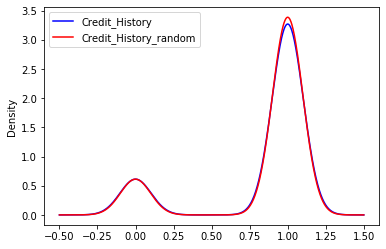

In [25]:
from matplotlib import pyplot as plt
plt.figure()
train_df.Credit_History.plot(kind='kde', color='blue', label="Credit_History")
train_df.Credit_History_random.plot(kind='kde', color='red', label="Credit_History_random")
plt.legend()
plt.show()

In [26]:
train_df.isnull().sum()

Gender                     13
Married                     3
Dependents                 15
Education                   0
Self_Employed              32
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
Property_Area               0
Loan_Status                 0
Gender_random               0
Married_random              0
Dependents_random           0
Self_Employed_random        0
LoanAmount_random           0
Loan_Amount_Term_random     0
Credit_History_random       0
dtype: int64

In [27]:
for val in empty_features:
    train_df = train_df.drop(val, axis="columns")

In [28]:
train_df.isnull().sum()

Education                  0
ApplicantIncome            0
CoapplicantIncome          0
Property_Area              0
Loan_Status                0
Gender_random              0
Married_random             0
Dependents_random          0
Self_Employed_random       0
LoanAmount_random          0
Loan_Amount_Term_random    0
Credit_History_random      0
dtype: int64

In [29]:
train_df.shape

(614, 12)

In [30]:
train_df.head()

,Education,ApplicantIncome,CoapplicantIncome,Property_Area,Loan_Status,Gender_random,Married_random,Dependents_random,Self_Employed_random,LoanAmount_random,Loan_Amount_Term_random,Credit_History_random
0,Graduate,5849,0.0,Urban,Y,Male,No,0,No,255.0,360.0,1.0
1,Graduate,4583,1508.0,Rural,N,Male,Yes,1,No,128.0,360.0,1.0
2,Graduate,3000,0.0,Urban,Y,Male,Yes,0,Yes,66.0,360.0,1.0
3,Not Graduate,2583,2358.0,Urban,Y,Male,Yes,0,No,120.0,360.0,1.0
4,Graduate,6000,0.0,Urban,Y,Male,No,0,No,141.0,360.0,1.0


### One Hot Encoding

In [31]:
train_df_2 = pd.get_dummies(train_df, drop_first=True)

In [32]:
train_df_2.head(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount_random,Loan_Amount_Term_random,Credit_History_random,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,Gender_random_Male,Married_random_Yes,Dependents_random_1,Dependents_random_2,Dependents_random_3+,Self_Employed_random_Yes
0,5849,0.0,255.0,360.0,1.0,0,0,1,1,1,0,0,0,0,0
1,4583,1508.0,128.0,360.0,1.0,0,0,0,0,1,1,1,0,0,0
2,3000,0.0,66.0,360.0,1.0,0,0,1,1,1,1,0,0,0,1
3,2583,2358.0,120.0,360.0,1.0,1,0,1,1,1,1,0,0,0,0
4,6000,0.0,141.0,360.0,1.0,0,0,1,1,1,0,0,0,0,0
5,5417,4196.0,267.0,360.0,1.0,0,0,1,1,1,1,0,1,0,1
6,2333,1516.0,95.0,360.0,1.0,1,0,1,1,1,1,0,0,0,0
7,3036,2504.0,158.0,360.0,0.0,0,1,0,0,1,1,0,0,1,0
8,4006,1526.0,168.0,360.0,1.0,0,0,1,1,1,1,0,1,0,0
9,12841,10968.0,349.0,360.0,1.0,0,1,0,0,1,1,1,0,0,0


In [33]:
train_df_2['Credit_History_random'].value_counts()

1.0    520
0.0     94
Name: Credit_History_random, dtype: int64

### Feature Scaling 

In [34]:
columns_to_scale = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount_random' ,'Loan_Amount_Term_random',
                    'Credit_History_random']

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_df_2[columns_to_scale] = scaler.fit_transform(train_df_2[columns_to_scale])

In [36]:
train_df_2.head(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount_random,Loan_Amount_Term_random,Credit_History_random,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,Gender_random_Male,Married_random_Yes,Dependents_random_1,Dependents_random_2,Dependents_random_3+,Self_Employed_random_Yes
0,0.072991,-0.554487,1.221951,0.278621,0.425170,0,0,1,1,1,0,0,0,0,0
1,-0.134412,-0.038732,-0.229308,0.278621,0.425170,0,0,0,0,1,1,1,0,0,0
2,-0.393747,-0.554487,-0.937797,0.278621,0.425170,0,0,1,1,1,1,0,0,0,1
3,-0.462062,0.251980,-0.320726,0.278621,0.425170,1,0,1,1,1,1,0,0,0,0
4,0.097728,-0.554487,-0.080754,0.278621,0.425170,0,0,1,1,1,0,0,0,0,0
5,0.002218,0.880600,1.359078,0.278621,0.425170,0,0,1,1,1,1,0,1,0,1
6,-0.503019,-0.035995,-0.606407,0.278621,0.425170,1,0,1,1,1,1,0,0,0,0
7,-0.387850,0.301914,0.113509,0.278621,-2.352002,0,1,0,0,1,1,0,0,1,0
8,-0.228939,-0.032575,0.227782,0.278621,0.425170,0,0,1,1,1,1,0,1,0,0
9,1.218457,3.196713,2.296112,0.278621,0.425170,0,1,0,0,1,1,1,0,0,0


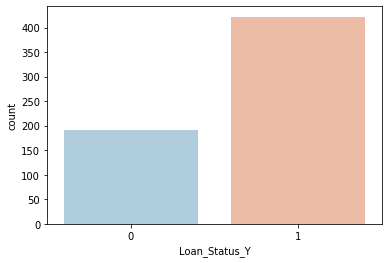

In [37]:
import seaborn as sns
sns.countplot(x='Loan_Status_Y', data=train_df_2, palette='RdBu_r')

In [142]:
train_df_2.shape

(614, 15)

## Hyper Parameter tuning and Model Selection

In [150]:
X = train_df_2.drop("Loan_Status_Y", axis="columns")
Y = train_df_2["Loan_Status_Y"]

In [151]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_sample(X,Y)

In [152]:
print(X_res.shape)
print(y_res.shape)

(804, 14)
(804,)


In [153]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({1: 422, 0: 192})
Resampled dataset shape Counter({1: 402, 0: 402})


In [155]:
print(X.shape)
print(X_res.shape)
print(Y.shape)
print(y_res.shape)

(614, 14)
(804, 14)
(614,)
(804,)


### Logistic Regression

In [157]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [158]:
lr_score = cross_val_score(LogisticRegression(), X_res, y_res, cv=10)
lr_score.mean()

0.7388888888888889

### Decision Tree

In [159]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
clf = GridSearchCV(DecisionTreeClassifier(), {'criterion':['gini', 'entropy']}, cv=10, return_train_score=False)
clf.fit(X_res, y_res)
clf.cv_results_

{'mean_fit_time': array([0.00730045, 0.00660028]),
 'std_fit_time': array([0.00200262, 0.0004899 ]),
 'mean_score_time': array([0.0038002 , 0.00220017]),
 'std_score_time': array([0.00227163, 0.0004001 ]),
 'param_criterion': masked_array(data=['gini', 'entropy'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'criterion': 'gini'}, {'criterion': 'entropy'}],
 'split0_test_score': array([0.75308642, 0.74074074]),
 'split1_test_score': array([0.7037037, 0.7037037]),
 'split2_test_score': array([0.7654321 , 0.77777778]),
 'split3_test_score': array([0.7037037 , 0.69135802]),
 'split4_test_score': array([0.8   , 0.8125]),
 'split5_test_score': array([0.8   , 0.7875]),
 'split6_test_score': array([0.7875, 0.75  ]),
 'split7_test_score': array([0.7375, 0.7   ]),
 'split8_test_score': array([0.775 , 0.7875]),
 'split9_test_score': array([0.75, 0.7 ]),
 'mean_test_score': array([0.75759259, 0.74510802]),
 'std_test_score': array([0.03338472,

In [160]:
dt_result_df = pd.DataFrame(clf.cv_results_)
dt_result_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.0073,0.002003,0.0038,0.002272,gini,{'criterion': 'gini'},0.753086,0.703704,0.765432,0.703704,0.8000,0.8000,0.7875,0.7375,0.7750,0.75,0.757593,0.033385,1
1,0.0066,0.000490,0.0022,0.000400,entropy,{'criterion': 'entropy'},0.740741,0.703704,0.777778,0.691358,0.8125,0.7875,0.7500,0.7000,0.7875,0.70,0.745108,0.042331,2


In [161]:
dt_result_df[['param_criterion', 'mean_test_score']]

,param_criterion,mean_test_score
0,gini,0.757593
1,entropy,0.745108


### Random Forest Classifier

In [168]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = GridSearchCV(RandomForestClassifier(), {'n_estimators':[ 10, 20, 30, 35, 40, 45]}, cv=10, return_train_score=False)
rf_clf.fit(X_res, y_res)
rf_clf.cv_results_

{'mean_fit_time': array([0.02840152, 0.04640262, 0.07310421, 0.08400476, 0.08710499,
        0.09850569]),
 'std_fit_time': array([0.00588593, 0.00128071, 0.0090167 , 0.01264194, 0.00113577,
        0.00092204]),
 'mean_score_time': array([0.00400031, 0.00490031, 0.00690033, 0.00700049, 0.00710042,
        0.00740047]),
 'std_score_time': array([0.00044723, 0.00030004, 0.00164024, 0.00134176, 0.00029999,
        0.00048992]),
 'param_n_estimators': masked_array(data=[10, 20, 30, 35, 40, 45],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 10},
  {'n_estimators': 20},
  {'n_estimators': 30},
  {'n_estimators': 35},
  {'n_estimators': 40},
  {'n_estimators': 45}],
 'split0_test_score': array([0.86419753, 0.91358025, 0.88888889, 0.87654321, 0.86419753,
        0.86419753]),
 'split1_test_score': array([0.75308642, 0.79012346, 0.75308642, 0.77777778, 0.77777778,
        0.80246914]),
 'split2_te

In [169]:
rf_result_df = pd.DataFrame(rf_clf.cv_results_)
rf_result_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.028402,0.005886,0.0040,0.000447,10,{'n_estimators': 10},0.864198,0.753086,0.802469,0.814815,0.7875,0.8750,0.8250,0.8375,0.9375,0.8250,0.832207,0.048496,6
1,0.046403,0.001281,0.0049,0.000300,20,{'n_estimators': 20},0.913580,0.790123,0.839506,0.790123,0.8750,0.9000,0.8375,0.7750,0.9000,0.8375,0.845833,0.047657,5
2,0.073104,0.009017,0.0069,0.001640,30,{'n_estimators': 30},0.888889,0.753086,0.851852,0.814815,0.8625,0.9125,0.8125,0.8250,0.9375,0.8500,0.850864,0.050881,4
3,0.084005,0.012642,0.0070,0.001342,35,{'n_estimators': 35},0.876543,0.777778,0.864198,0.827160,0.8375,0.9250,0.8500,0.8375,0.9250,0.8125,0.853318,0.044162,3
4,0.087105,0.001136,0.0071,0.000300,40,{'n_estimators': 40},0.864198,0.777778,0.839506,0.802469,0.8875,0.9125,0.8500,0.8500,0.9250,0.8625,0.857145,0.042860,1
5,0.098506,0.000922,0.0074,0.000490,45,{'n_estimators': 45},0.864198,0.802469,0.851852,0.814815,0.8750,0.9250,0.8250,0.7875,0.9125,0.8875,0.854583,0.044256,2


In [170]:
rf_result_df[['param_n_estimators', 'mean_test_score']]

,param_n_estimators,mean_test_score
0,10,0.832207
1,20,0.845833
2,30,0.850864
3,35,0.853318
4,40,0.857145
5,45,0.854583


### SVM

In [171]:
from sklearn.svm import SVC
svm_clf = GridSearchCV(SVC(), {'C': [1,10,20], 'kernel': ['rbf','linear']}, cv=10, return_train_score=False)
svm_clf.fit(X_res, y_res)
svm_clf.cv_results_

{'mean_fit_time': array([0.01980119, 0.016501  , 0.02170134, 0.03320189, 0.02490146,
        0.05100291]),
 'std_fit_time': array([0.00193917, 0.00283733, 0.00064036, 0.00370967, 0.00137482,
        0.00605016]),
 'mean_score_time': array([0.00390019, 0.00300009, 0.00340014, 0.0028002 , 0.00350015,
        0.00300016]),
 'std_score_time': array([8.30688296e-04, 1.09257119e-07, 4.89940328e-04, 6.00012160e-04,
        1.20426028e-03, 1.90734863e-07]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20

In [172]:
svm_result_df = pd.DataFrame(svm_clf.cv_results_)
svm_result_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.019801,0.001939,0.0039,8.306883e-04,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.765432,0.703704,0.814815,0.691358,0.7250,0.7625,0.7875,0.7000,0.7750,0.7500,0.747531,0.039081,5
1,0.016501,0.002837,0.0030,1.092571e-07,1,linear,"{'C': 1, 'kernel': 'linear'}",0.802469,0.728395,0.703704,0.728395,0.7125,0.7375,0.7750,0.6500,0.8250,0.7750,0.743796,0.048870,6
2,0.021701,0.000640,0.0034,4.899403e-04,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.839506,0.765432,0.753086,0.703704,0.8000,0.8500,0.8625,0.7000,0.8625,0.8125,0.794923,0.058686,1
3,0.033202,0.003710,0.0028,6.000122e-04,10,linear,"{'C': 10, 'kernel': 'linear'}",0.814815,0.728395,0.703704,0.728395,0.7125,0.7375,0.8000,0.6750,0.8250,0.7625,0.748781,0.047678,3
4,0.024901,0.001375,0.0035,1.204260e-03,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.864198,0.740741,0.802469,0.716049,0.8000,0.8500,0.8500,0.7125,0.8500,0.7500,0.793596,0.056509,2
5,0.051003,0.006050,0.0030,1.907349e-07,20,linear,"{'C': 20, 'kernel': 'linear'}",0.814815,0.728395,0.703704,0.728395,0.7125,0.7375,0.8000,0.6750,0.8250,0.7625,0.748781,0.047678,3


In [173]:
svm_result_df[['param_C', 'param_kernel', 'mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.747531
1,1,linear,0.743796
2,10,rbf,0.794923
3,10,linear,0.748781
4,20,rbf,0.793596
5,20,linear,0.748781


### Naives Bayes

In [174]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GridSearchCV(GaussianNB(),{}, cv=10, return_train_score=False)
nb_clf.fit(X_res, y_res)
nb_clf.cv_results_

{'mean_fit_time': array([0.00470026]),
 'std_fit_time': array([0.00100505]),
 'mean_score_time': array([0.00330014]),
 'std_score_time': array([0.00195198]),
 'params': [{}],
 'split0_test_score': array([0.75308642]),
 'split1_test_score': array([0.7037037]),
 'split2_test_score': array([0.77777778]),
 'split3_test_score': array([0.7654321]),
 'split4_test_score': array([0.675]),
 'split5_test_score': array([0.7125]),
 'split6_test_score': array([0.7375]),
 'split7_test_score': array([0.6625]),
 'split8_test_score': array([0.7875]),
 'split9_test_score': array([0.7375]),
 'mean_test_score': array([0.73125]),
 'std_test_score': array([0.04006651]),
 'rank_test_score': array([1])}

In [175]:
nb_result_df = pd.DataFrame(nb_clf.cv_results_)
nb_result_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.0047,0.001005,0.0033,0.001952,{},0.753086,0.703704,0.777778,0.765432,0.675,0.7125,0.7375,0.6625,0.7875,0.7375,0.73125,0.040067,1


In [176]:
nb_result_df[['mean_test_score']]

,mean_test_score
0,0.73125


### K_Nearest_Neighbours

In [178]:
from sklearn.neighbors import KNeighborsClassifier
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn_score=cross_val_score(knn, X_res ,y_res, cv=10)
    accuracy_rate.append(knn_score.mean())

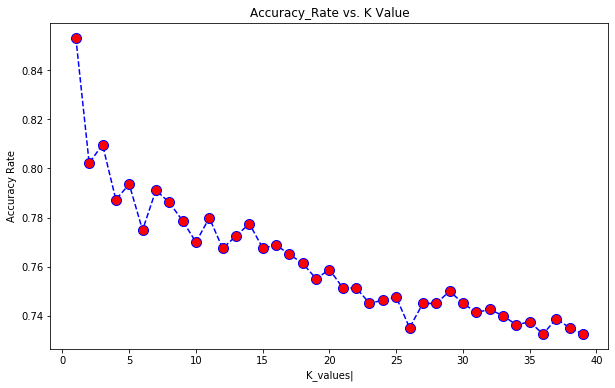

In [179]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), accuracy_rate, color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy_Rate vs. K Value')
plt.xlabel('K_values|')
plt.ylabel('Accuracy Rate')
plt.show()

In [180]:
knn_clf = GridSearchCV(KNeighborsClassifier(),{"n_neighbors":[1, 3, 5, 7, 9, 10, 12, 13, 14, 16, 20, 23, 25, 28, 30]}, cv=12, return_train_score=False)
knn_clf.fit(X, Y)
knn_clf.cv_results_

{'mean_fit_time': array([0.00625044, 0.00516697, 0.00533362, 0.00508366, 0.0053336 ,
        0.00508366, 0.00658373, 0.00833378, 0.00575026, 0.00608369,
        0.00558368, 0.00533366, 0.00525031, 0.00541703, 0.00516701]),
 'std_fit_time': array([0.00158781, 0.00037262, 0.00047148, 0.00027644, 0.0004715 ,
        0.00027644, 0.00205999, 0.00221126, 0.00142163, 0.00132039,
        0.00049296, 0.00047137, 0.00043304, 0.00049306, 0.00037265]),
 'mean_score_time': array([0.00633361, 0.00533362, 0.00541701, 0.0053336 , 0.0055003 ,
        0.00533362, 0.00683369, 0.0085838 , 0.01008395, 0.01000057,
        0.00650036, 0.00558362, 0.00566701, 0.00583361, 0.00583359]),
 'std_score_time': array([0.00246091, 0.00047152, 0.00049303, 0.00047141, 0.00049998,
        0.00047136, 0.00195095, 0.00246518, 0.00075926, 0.00057741,
        0.00104083, 0.00049308, 0.0004714 , 0.00037259, 0.00055283]),
 'param_n_neighbors': masked_array(data=[1, 3, 5, 7, 9, 10, 12, 13, 14, 16, 20, 23, 25, 28, 30],
         

In [181]:
knn_results_df = pd.DataFrame(knn_clf.cv_results_)
knn_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,split11_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006250,0.001588,0.006334,0.002461,1,{'n_neighbors': 1},0.769231,0.730769,0.784314,0.784314,...,0.686275,0.803922,0.686275,0.745098,0.745098,0.764706,0.647059,0.741013,0.044759,15
1,0.005167,0.000373,0.005334,0.000472,3,{'n_neighbors': 3},0.788462,0.826923,0.784314,0.803922,...,0.823529,0.705882,0.843137,0.803922,0.745098,0.784314,0.725490,0.776772,0.048026,14
2,0.005334,0.000471,0.005417,0.000493,5,{'n_neighbors': 5},0.769231,0.846154,0.764706,0.823529,...,0.803922,0.764706,0.843137,0.843137,0.764706,0.803922,0.784314,0.793112,0.040471,11
3,0.005084,0.000276,0.005334,0.000471,7,{'n_neighbors': 7},0.788462,0.846154,0.725490,0.784314,...,0.764706,0.803922,0.823529,0.843137,0.764706,0.823529,0.803922,0.789813,0.041996,13
4,0.005334,0.000471,0.005500,0.000500,9,{'n_neighbors': 9},0.769231,0.846154,0.745098,0.784314,...,0.784314,0.823529,0.823529,0.862745,0.784314,0.843137,0.843137,0.801282,0.045124,8
5,0.005084,0.000276,0.005334,0.000471,10,{'n_neighbors': 10},0.769231,0.846154,0.725490,0.784314,...,0.764706,0.803922,0.823529,0.862745,0.764706,0.823529,0.803922,0.789844,0.044779,12
6,0.006584,0.002060,0.006834,0.001951,12,{'n_neighbors': 12},0.807692,0.846154,0.764706,0.784314,...,0.803922,0.823529,0.823529,0.823529,0.803922,0.823529,0.803922,0.801219,0.035098,9
7,0.008334,0.002211,0.008584,0.002465,13,{'n_neighbors': 13},0.807692,0.826923,0.764706,0.784314,...,0.803922,0.784314,0.843137,0.843137,0.823529,0.843137,0.803922,0.804519,0.034151,7
8,0.005750,0.001422,0.010084,0.000759,14,{'n_neighbors': 14},0.807692,0.826923,0.745098,0.784314,...,0.803922,0.784314,0.843137,0.823529,0.803922,0.843137,0.803922,0.799617,0.034353,10
9,0.006084,0.001320,0.010001,0.000577,16,{'n_neighbors': 16},0.807692,0.826923,0.764706,0.784314,...,0.803922,0.784314,0.823529,0.843137,0.823529,0.843137,0.843137,0.806153,0.034550,6


In [182]:
knn_results_df[["param_n_neighbors", "mean_test_score" ]]

,param_n_neighbors,mean_test_score
0,1,0.741013
1,3,0.776772
2,5,0.793112
3,7,0.789813
4,9,0.801282
5,10,0.789844
6,12,0.801219
7,13,0.804519
8,14,0.799617
9,16,0.806153


#### So finally we can use svm to create our model

In [184]:
from sklearn.svm import SVC
model = SVC(C =10, kernel='linear')
model.fit(X, Y)

SVC(C=10, kernel='linear')

In [120]:
knn_model = KNeighborsClassifier(n_neighbors=23)
knn_model.fit(X, Y)

KNeighborsClassifier(n_neighbors=23)

### Import the test dataset

In [54]:
test_df = pd.read_csv("E:\\Data Science\\Analytics Vidhya Datasets\\Loan_test.csv")
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [56]:
loan_id_df = test_df["Loan_ID"]

In [57]:
test_df = test_df.drop("Loan_ID", axis="columns")

In [58]:
test_df.shape

(367, 11)

### fill the missing values in the test data

In [59]:
test_df.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [60]:
test_empty_features = [col for col in test_df.columns if (test_df[col].isnull().sum())!=0]
test_empty_features

['Gender',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [61]:
for val in test_empty_features:
    impute_na_random(test_df, val)

In [63]:
for val in test_empty_features:
    test_df = test_df.drop(val, axis="columns")

In [64]:
test_df.isnull().sum()

Married                    0
Education                  0
ApplicantIncome            0
CoapplicantIncome          0
Property_Area              0
Gender_random              0
Dependents_random          0
Self_Employed_random       0
LoanAmount_random          0
Loan_Amount_Term_random    0
Credit_History_random      0
dtype: int64

### One hot encoding for test data

In [65]:
test_df_2 = pd.get_dummies(test_df, drop_first=True)

In [66]:
test_df_2.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount_random,Loan_Amount_Term_random,Credit_History_random,Married_Yes,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Gender_random_Male,Dependents_random_1,Dependents_random_2,Dependents_random_3+,Self_Employed_random_Yes
0,5720,0,110.0,360.0,1.0,1,0,0,1,1,0,0,0,0
1,3076,1500,126.0,360.0,1.0,1,0,0,1,1,1,0,0,0
2,5000,1800,208.0,360.0,1.0,1,0,0,1,1,0,1,0,0
3,2340,2546,100.0,360.0,1.0,1,0,0,1,1,0,1,0,0
4,3276,0,78.0,360.0,1.0,0,1,0,1,1,0,0,0,0


### Scaling the test data

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
test_df_2 = scaler.fit_transform(test_df_2)

In [68]:
train_df_2.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount_random,Loan_Amount_Term_random,Credit_History_random,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,Gender_random_Male,Married_random_Yes,Dependents_random_1,Dependents_random_2,Dependents_random_3+,Self_Employed_random_Yes
0,0.072991,-0.554487,1.221951,0.278621,0.42517,0,0,1,1,1,0,0,0,0,0
1,-0.134412,-0.038732,-0.229308,0.278621,0.42517,0,0,0,0,1,1,1,0,0,0
2,-0.393747,-0.554487,-0.937797,0.278621,0.42517,0,0,1,1,1,1,0,0,0,1
3,-0.462062,0.251980,-0.320726,0.278621,0.42517,1,0,1,1,1,1,0,0,0,0
4,0.097728,-0.554487,-0.080754,0.278621,0.42517,0,0,1,1,1,0,0,0,0,0


### Predicting for the test data using SVM

In [71]:
prediction = model.predict(test_df_2)

In [81]:
loan_status = pd.DataFrame(prediction, columns=["Loan_Status"])
loan_status.head()

,Loan_Status
0,1
1,1
2,1
3,1
4,1


In [140]:
Final_Prediction_df = pd.concat([loan_id_df, loan_status], axis="columns")
Final_Prediction_df.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [84]:
Final_Prediction_df["Loan_Status"] = Final_Prediction_df["Loan_Status"].map({1:"Y", 0:"N"})

In [89]:
Final_Prediction_df.tail(5)

,Loan_ID,Loan_Status
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y
366,LP002989,Y


In [101]:
Final_Prediction_df.to_csv("E:\Data Science\Jupyter_Notebook_Ex\ML_Projects\Prediction.csv", index=False)

### Using KNN model

In [122]:
knn_prediction = knn_model.predict(test_df_2)

In [123]:
knn_loan_status = pd.DataFrame(knn_prediction, columns=["Loan_Status"])

In [125]:
Final_Prediction_df_knn = pd.concat([loan_id_df, knn_loan_status], axis="columns")
Final_Prediction_df_knn.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [126]:
Final_Prediction_df_knn["Loan_Status"] = Final_Prediction_df_knn["Loan_Status"].map({1:"Y", 0:"N"})

In [127]:
Final_Prediction_df_knn.to_csv("E:\Data Science\Jupyter_Notebook_Ex\ML_Projects\Prediction_knn.csv", index=False)

### Using the Logistic Regression

In [131]:
lr_model = LogisticRegression()
lr_model.fit(X, Y)

LogisticRegression()

In [135]:
lr_prediction = lr_model.predict(test_df_2)

In [136]:
lr_loan_status = pd.DataFrame(lr_prediction, columns=["Loan_Status"])

In [137]:
Final_Prediction_df_lr = pd.concat([loan_id_df, lr_loan_status], axis="columns")

In [138]:
Final_Prediction_df_lr["Loan_Status"] = Final_Prediction_df_lr["Loan_Status"].map({1:"Y", 0:"N"})

In [139]:
Final_Prediction_df_lr.to_csv("E:\Data Science\Jupyter_Notebook_Ex\ML_Projects\Prediction_lr.csv", index=False)

### Random Forest

In [185]:
rf_model = RandomForestClassifier()
rf_model.fit(X_res, y_res)

RandomForestClassifier()

In [186]:
rf_prediction = rf_model.predict(test_df_2)

In [187]:
rf_loan_status = pd.DataFrame(rf_prediction, columns=["Loan_Status"])

In [188]:
Final_Prediction_df_rf = pd.concat([loan_id_df, rf_loan_status], axis="columns")

In [189]:
Final_Prediction_df_rf["Loan_Status"] = Final_Prediction_df_rf["Loan_Status"].map({1:"Y", 0:"N"})

In [190]:
Final_Prediction_df_rf.to_csv("E:\Data Science\Jupyter_Notebook_Ex\ML_Projects\Prediction_rf.csv", index=False)